In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from matplotlib import rcParams
np.set_printoptions(suppress=True)

In [17]:
path = '../ForceData(Degree 20)/20250515'

data = get_data_in_directory(path)

print(len(data))

18


In [18]:
selected_id = 1
period = 140

In [19]:
data[selected_id].shape

(560, 54)

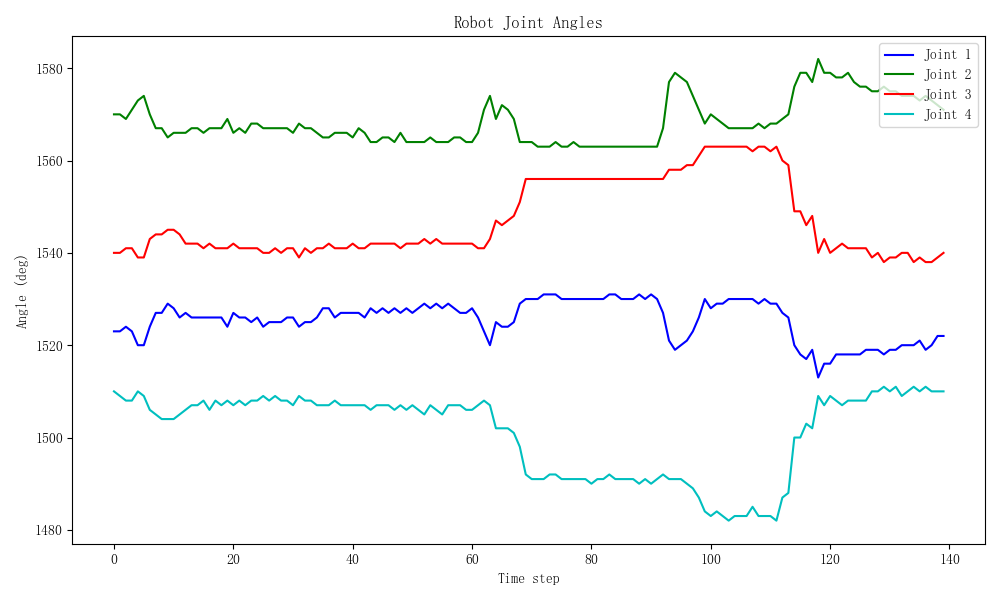

In [36]:
plt.close('all')
plot_joint_angles(data[selected_id][period*2:period*3,44:48], title="Robot Joint Angles", xlabel="Time step", ylabel="Angle (deg)")


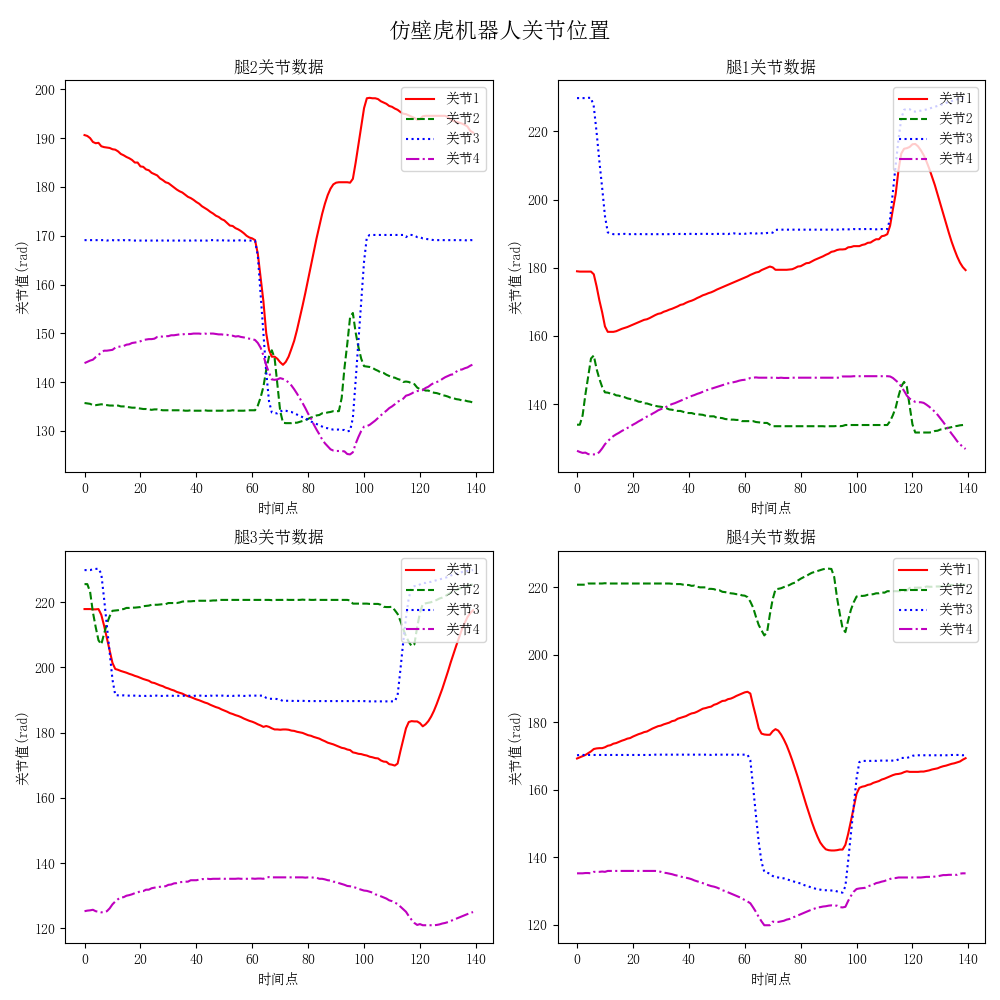

In [30]:
plt.close('all')
plot_leg_joints(data[selected_id][period*2:period*3,:16], 
                   title='仿壁虎机器人关节位置',
                  )

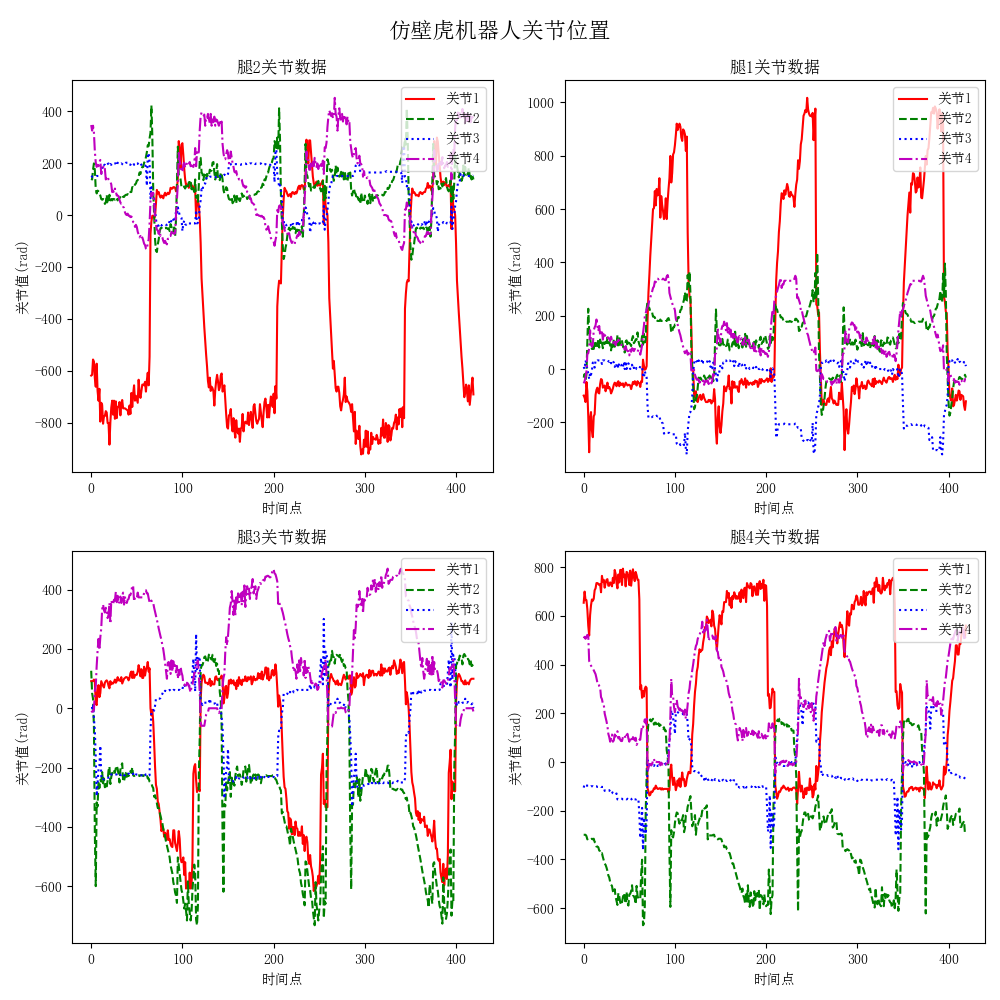

In [24]:
plt.close('all')
plot_leg_joints(data[selected_id][period:period*4,16:32], 
                   title='仿壁虎机器人关节位置',
                  )

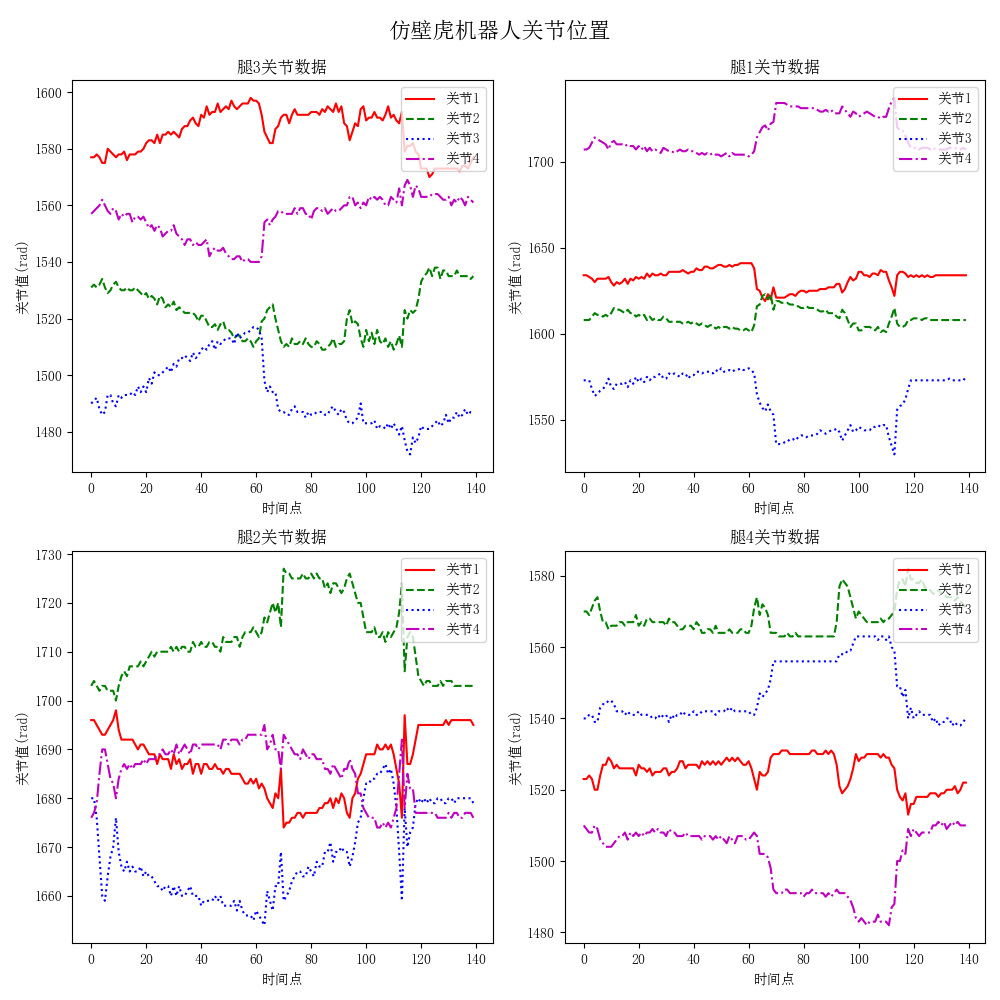

In [39]:
plt.close('all')
plot_leg_forces(data[selected_id][period*2:period*3,32:48], 
                   title='仿壁虎机器人关节位置',
                  )

In [22]:
def plot_leg_joints(data, joint_label='关节', title='四足机器人关节数据', save_path=None):
    """
    绘制四足机器人关节数据的2x2子图
    
    参数:
        data: numpy数组，形状为[n,16]，包含四个腿的关节数据
        joint_label: 关节标签名称 (默认: '关节')
        title: 图表标题 (默认: '四足机器人关节数据')
        save_path: 图片保存路径 (可选)，如'output.png'
    """
    # 设置中文字体为宋体
    plt.rcParams['font.sans-serif'] = ['SimSun']  # 或者使用 'STSong'
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
    
    # 检查数据形状
    if data.shape[1] != 16:
        raise ValueError("输入数据的列数应为16 (4腿×4关节)")
    
    # 创建2x2的子图布局
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle(title, fontsize=16)

    # 定义每个腿的标签和颜色
    leg_names = ['腿1', '腿2', '腿3', '腿4']
    joint_names = [f'{joint_label}{i+1}' for i in range(4)]  # 使用输入的关节标签
    colors = ['r', 'g', 'b', 'm']  # 每种关节的颜色
    line_styles = ['-', '--', ':', '-.']  # 可选的线型

    # 绘制每个腿的数据
    for leg_idx in range(4):
        # 确定子图位置
        if leg_idx == 0:  # Leg1 -> (0,1)
            ax = axs[0, 1]
        elif leg_idx == 1:  # Leg2 -> (0,0)
            ax = axs[0, 0]
        elif leg_idx == 2:  # Leg3 -> (1,0)
            ax = axs[1, 0]
        else:  # Leg4 -> (1,1)
            ax = axs[1, 1]
        
        # 提取当前腿的数据 (4个关节)
        leg_data = data[:, leg_idx*4 : (leg_idx+1)*4]
        
        # 绘制每个关节的数据
        for joint_idx in range(4):
            ax.plot(leg_data[:, joint_idx], 
                    color=colors[joint_idx],
                    linestyle=line_styles[joint_idx],
                    linewidth=1.5,
                    label=joint_names[joint_idx])
        
        # 设置子图标题和标签
        ax.set_title(f'{leg_names[leg_idx]}{joint_label}数据')
        ax.set_xlabel('时间点')
        ax.set_ylabel(f'{joint_label}值(rad)')
        ax.legend(loc='upper right')
        # ax.grid(True, linestyle='--', alpha=0.6)

    # 调整子图间距
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)

    # 保存或显示图形
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"图表已保存至: {save_path}")
    plt.show()

In [2]:
'''读取并返回文件夹中的数据'''
def get_data_in_directory(path):
    data = []
    for file_name in os.listdir(path):
        file_path = os.path.join(path, file_name)
        
        # 这里注意需要把读入的数据进行翻转
        data.append(np.load(file_path).T)
    return data

In [3]:
def plot_joint_angles(joint_angles, title="Joint Angles", xlabel="Time", ylabel="Angle (degrees)"):
    """
    绘制四关节角度信号
    
    参数:
        joint_angles: 形状为(n,4)的numpy数组，包含四个关节的角度数据
        title: 图表标题 (默认: "Joint Angles")
        xlabel: x轴标签 (默认: "Time")
        ylabel: y轴标签 (默认: "Angle (degrees)")
    """
    # 检查输入数据
    if not isinstance(joint_angles, np.ndarray) or joint_angles.shape[1] != 4:
        raise ValueError("输入数据必须是形状为(n,4)的numpy数组")
    
    # 创建图形和轴
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # 时间轴 (假设是等间隔采样)
    time = np.arange(joint_angles.shape[0])
    
    # 为每个关节绘制曲线
    joints = ['Joint 1', 'Joint 2', 'Joint 3', 'Joint 4']
    colors = ['b', 'g', 'r', 'c']  # 不同颜色区分关节
    
    for i in range(4):
        ax.plot(time, joint_angles[:, i], 
                color=colors[i], 
                label=joints[i],
                linewidth=1.5)
    
    # 添加图例和标签
    ax.legend(loc='upper right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # # 添加网格
    # ax.grid(True, linestyle='--', alpha=0.6)
    
    # 自动调整布局
    plt.tight_layout()
    
    # 显示图形

In [38]:
def plot_leg_forces(data, joint_label='关节', title='四足机器人关节数据', save_path=None):
    """
    绘制四足机器人关节数据的2x2子图
    
    参数:
        data: numpy数组，形状为[n,16]，包含四个腿的关节数据
        joint_label: 关节标签名称 (默认: '关节')
        title: 图表标题 (默认: '四足机器人关节数据')
        save_path: 图片保存路径 (可选)，如'output.png'
    """
    # 设置中文字体为宋体
    plt.rcParams['font.sans-serif'] = ['SimSun']  # 或者使用 'STSong'
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
    
    # 检查数据形状
    if data.shape[1] != 16:
        raise ValueError("输入数据的列数应为16 (4腿×4关节)")
    
    # 创建2x2的子图布局
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle(title, fontsize=16)

    # 定义每个腿的标签和颜色
    leg_names = ['腿1', '腿2', '腿3', '腿4']
    joint_names = [f'{joint_label}{i+1}' for i in range(4)]  # 使用输入的关节标签
    colors = ['r', 'g', 'b', 'm']  # 每种关节的颜色
    line_styles = ['-', '--', ':', '-.']  # 可选的线型

    # 绘制每个腿的数据
    for leg_idx in range(4):
        # 确定子图位置
        if leg_idx == 0:  # Leg1 -> (0,1)
            ax = axs[0, 1]
        elif leg_idx == 1:  # Leg2 -> (0,0)
            ax = axs[1, 0]
        elif leg_idx == 2:  # Leg3 -> (1,0)
            ax = axs[0, 0]
        else:  # Leg4 -> (1,1)
            ax = axs[1, 1]
        
        # 提取当前腿的数据 (4个关节)
        leg_data = data[:, leg_idx*4 : (leg_idx+1)*4]
        
        # 绘制每个关节的数据
        for joint_idx in range(4):
            ax.plot(leg_data[:, joint_idx], 
                    color=colors[joint_idx],
                    linestyle=line_styles[joint_idx],
                    linewidth=1.5,
                    label=joint_names[joint_idx])
        
        # 设置子图标题和标签
        ax.set_title(f'{leg_names[leg_idx]}{joint_label}数据')
        ax.set_xlabel('时间点')
        ax.set_ylabel(f'{joint_label}值(rad)')
        ax.legend(loc='upper right')
        # ax.grid(True, linestyle='--', alpha=0.6)

    # 调整子图间距
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)

    # # 保存或显示图形
    # if save_path:
    #     plt.savefig(save_path, dpi=300, bbox_inches='tight')
    #     print(f"图表已保存至: {save_path}")
    plt.show()